# [作業目標]
- 使用 Day 17 剛學到的方法, 對較完整的資料生成離散化特徵
- 觀察上述離散化特徵, 對於目標值的預測有沒有幫助

# [作業重點]
- 仿照 Day 17 的語法, 將年齡資料 ('DAYS_BIRTH' 除以 365) 離散化
- 繪製上述的 "離散化標籤" 與目標值 ('TARGET') 的長條圖

In [12]:
# 載入需要的套件
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 設定 data_path
dir_data = './data/'

### 之前做過的處理

In [13]:
# 讀取資料檔
f_app_train = os.path.join(dir_data, 'application_train.csv')
app_train = pd.read_csv(f_app_train)
app_train.shape

(307511, 122)

In [14]:
# 將只有兩種值的類別型欄位, 做 Label Encoder, 計算相關係數時讓這些欄位可以被包含在內
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

# 檢查每一個 column
for col in app_train:
    if app_train[col].dtype == 'object':
        # 如果只有兩種值的類別型欄位
        if len(list(app_train[col].unique())) <= 2:
            # 就做 Label Encoder, 以加入相關係數檢查
            app_train[col] = le.fit_transform(app_train[col])            
print(app_train.shape)
app_train.head()

(307511, 122)


,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,0,M,0,1,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,0,F,0,0,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,1,M,1,1,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,0,F,0,1,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,0,M,0,1,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [15]:
# 受雇日數為異常值的資料, 另外設一個欄位記錄, 並將異常的日數轉成空值 (np.nan)
app_train['DAYS_EMPLOYED_ANOM'] = app_train["DAYS_EMPLOYED"] == 365243
app_train['DAYS_EMPLOYED'].replace({365243: np.nan}, inplace = True)

# 出生日數 (DAYS_BIRTH) 取絕對值 
app_train['DAYS_BIRTH'] = abs(app_train['DAYS_BIRTH'])

## 練習時間
參考 Day 17 範例程式，離散化你覺得有興趣的欄位，並嘗試找出有趣的訊息

In [33]:
# 觀察等寬劃分
app_train["equal_width_DAYS_BIRTH"] = pd.cut(app_train["DAYS_BIRTH"], 20)
app_train["equal_width_DAYS_BIRTH"].value_counts()
# 每個 bin 的值的範圍大小都是一樣的

(13698.0, 14585.0]    21511
(14585.0, 15472.0]    20548
(12811.0, 13698.0]    20247
(15472.0, 16359.0]    19802
(11037.0, 11924.0]    19730
(10150.0, 11037.0]    19095
(11924.0, 12811.0]    18700
(16359.0, 17246.0]    17679
(19020.0, 19907.0]    17511
(19907.0, 20794.0]    16804
(17246.0, 18133.0]    16656
(18133.0, 19020.0]    16035
(20794.0, 21681.0]    15831
(21681.0, 22568.0]    14845
(9263.0, 10150.0]     14025
(22568.0, 23455.0]    12842
(8376.0, 9263.0]       9633
(23455.0, 24342.0]     8511
(7471.26, 8376.0]      4053
(24342.0, 25229.0]     3453
Name: equal_width_DAYS_BIRTH, dtype: int64

In [34]:
# 觀察等頻劃分
app_train["equal_freq_DAYS_BIRTH"] = pd.qcut(app_train["DAYS_BIRTH"], 20)
app_train["equal_freq_DAYS_BIRTH"].value_counts().sort_values()
# 每個 bin 的值的範圍大小都是一樣的

(18037.0, 18885.0]    15360
(15071.0, 15750.0]    15364
(23204.0, 25229.0]    15367
(19682.0, 20474.0]    15368
(11005.0, 11694.0]    15369
(9407.0, 10284.0]     15371
(22181.0, 23204.0]    15371
(11694.0, 12413.0]    15372
(17220.0, 18037.0]    15373
(16462.0, 17220.0]    15373
(12413.0, 13140.0]    15373
(21316.0, 22181.0]    15375
(13140.0, 13784.0]    15375
(14416.0, 15071.0]    15381
(7488.999, 9407.0]    15381
(20474.0, 21316.0]    15382
(13784.0, 14416.0]    15384
(18885.0, 19682.0]    15390
(15750.0, 16462.0]    15391
(10284.0, 11005.0]    15391
Name: equal_freq_DAYS_BIRTH, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

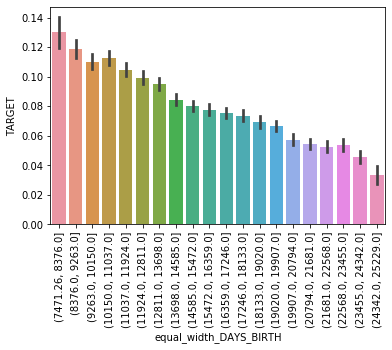

In [39]:
x = app_train['equal_width_DAYS_BIRTH']
y = app_train['TARGET']
sns.barplot(x, y)
plt.xticks(rotation = 90)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19]), <a list of 20 Text xticklabel objects>)

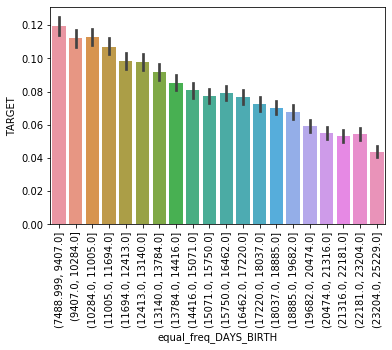

In [40]:
x = app_train['equal_freq_DAYS_BIRTH']
y = app_train['TARGET']
sns.barplot(x, y)
plt.xticks(rotation = 90)